## ProjF5 - Final Model

Use this document as a template to provide the evaluation of your final model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [54]:
### YOUR CODE HERE
##TRAIN
import os
import os.path
from pathlib import Path
No_Data_Path = Path("drive/MyDrive/sample_data/no")
Yes_Data_Path = Path("drive/MyDrive/sample_data/yes")

No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [55]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('drive/MyDrive/sample_data/no/no1062.jpg'), PosixPath('drive/MyDrive/sample_data/no/no122.jpg'), PosixPath('drive/MyDrive/sample_data/no/no144.jpg'), PosixPath('drive/MyDrive/sample_data/no/no1333.jpg'), PosixPath('drive/MyDrive/sample_data/no/no1187.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('drive/MyDrive/sample_data/yes/y1475.jpg'), PosixPath('drive/MyDrive/sample_data/yes/y165.jpg'), PosixPath('drive/MyDrive/sample_data/yes/y1237.jpg'), PosixPath('drive/MyDrive/sample_data/yes/y1311.jpg'), PosixPath('drive/MyDrive/sample_data/yes/y1056.jpg')]


In [56]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)

for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [57]:
print(Yes_No_List[0:10])

[PosixPath('drive/MyDrive/sample_data/no/no1062.jpg'), PosixPath('drive/MyDrive/sample_data/no/no122.jpg'), PosixPath('drive/MyDrive/sample_data/no/no144.jpg'), PosixPath('drive/MyDrive/sample_data/no/no1333.jpg'), PosixPath('drive/MyDrive/sample_data/no/no1187.jpg'), PosixPath('drive/MyDrive/sample_data/no/no186.jpg'), PosixPath('drive/MyDrive/sample_data/no/no1327.jpg'), PosixPath('drive/MyDrive/sample_data/no/no1430.jpg'), PosixPath('drive/MyDrive/sample_data/no/no21.jpg'), PosixPath('drive/MyDrive/sample_data/no/no145.jpg')]


In [58]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [59]:
print(JPG_Labels[0:10])
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
NO COUNTING:  1500
YES COUNTING:  1500


In [60]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [61]:
##TEST
Prediction_Path = Path("drive/MyDrive/sample_data/pred")
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [62]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [63]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [64]:
print(Test_Data.head())

                                         JPG TUMOR_CATEGORY
0  drive/MyDrive/sample_data/pred/pred39.jpg           pred
1  drive/MyDrive/sample_data/pred/pred10.jpg           pred
2  drive/MyDrive/sample_data/pred/pred38.jpg           pred
3   drive/MyDrive/sample_data/pred/pred4.jpg           pred
4   drive/MyDrive/sample_data/pred/pred6.jpg           pred


In [65]:
# Main Train Data
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)
print(Main_Train_Data.head(-1))

                                          JPG TUMOR_CATEGORY
0     drive/MyDrive/sample_data/no/no1062.jpg             no
1      drive/MyDrive/sample_data/no/no122.jpg             no
2      drive/MyDrive/sample_data/no/no144.jpg             no
3     drive/MyDrive/sample_data/no/no1333.jpg             no
4     drive/MyDrive/sample_data/no/no1187.jpg             no
...                                       ...            ...
2994  drive/MyDrive/sample_data/yes/y1173.jpg            yes
2995  drive/MyDrive/sample_data/yes/y1258.jpg            yes
2996   drive/MyDrive/sample_data/yes/y158.jpg            yes
2997   drive/MyDrive/sample_data/yes/y156.jpg            yes
2998  drive/MyDrive/sample_data/yes/y1243.jpg            yes

[2999 rows x 2 columns]


In [66]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)
print(Main_Train_Data.head(-1))

                                          JPG TUMOR_CATEGORY
0     drive/MyDrive/sample_data/yes/y1472.jpg            yes
1      drive/MyDrive/sample_data/no/no789.jpg             no
2      drive/MyDrive/sample_data/yes/y784.jpg            yes
3      drive/MyDrive/sample_data/yes/y845.jpg            yes
4      drive/MyDrive/sample_data/no/no811.jpg             no
...                                       ...            ...
2994  drive/MyDrive/sample_data/yes/y1121.jpg            yes
2995   drive/MyDrive/sample_data/no/no402.jpg             no
2996   drive/MyDrive/sample_data/yes/y658.jpg            yes
2997  drive/MyDrive/sample_data/yes/y1127.jpg            yes
2998  drive/MyDrive/sample_data/yes/y1277.jpg            yes

[2999 rows x 2 columns]


In [67]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [68]:
print(train_data.shape)

(2700, 2)


In [69]:
print(train_data.head())

                                          JPG TUMOR_CATEGORY
433   drive/MyDrive/sample_data/no/no1226.jpg             no
1151  drive/MyDrive/sample_data/no/no1056.jpg             no
73    drive/MyDrive/sample_data/yes/y1137.jpg            yes
1536   drive/MyDrive/sample_data/no/no834.jpg             no
2709   drive/MyDrive/sample_data/yes/y643.jpg            yes


In [70]:
print(test_data.shape)

(300, 2)


In [71]:
print(test_data.head())

                                          JPG TUMOR_CATEGORY
1801  drive/MyDrive/sample_data/yes/y1337.jpg            yes
1190   drive/MyDrive/sample_data/no/no384.jpg             no
1817   drive/MyDrive/sample_data/yes/y184.jpg            yes
251   drive/MyDrive/sample_data/no/no1157.jpg             no
2505  drive/MyDrive/sample_data/yes/y1255.jpg            yes


### 2. Prepare your Final Model

Here you can have your code to either train (e.g., if you are building it from scratch) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras.optimizers import RMSprop,Adam
Generator_Basic = ImageDataGenerator(rescale=1./255,validation_split=0.1)

In [73]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [74]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [75]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


In [76]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Convolutional layers with increased depth and smaller kernel sizes
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))



# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 99, 99, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 99, 99, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 48, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 128)      

In [77]:
#MODEL COMPILE
#Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
#MODEL FITTING
ANN_Model = model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=10,steps_per_epoch=120)

Epoch 1/10
120/120 [==============================] - 20s 145ms/step - loss: 0.5946 - accuracy: 0.7201 - val_loss: 0.4699 - val_accuracy: 0.7815
Epoch 2/10
120/120 [==============================] - 14s 119ms/step - loss: 0.4261 - accuracy: 0.8079 - val_loss: 0.3634 - val_accuracy: 0.8259
Epoch 3/10
120/120 [==============================] - 15s 121ms/step - loss: 0.3257 - accuracy: 0.8696 - val_loss: 0.3183 - val_accuracy: 0.8778
Epoch 4/10
120/120 [==============================] - 14s 119ms/step - loss: 0.2472 - accuracy: 0.8983 - val_loss: 0.2129 - val_accuracy: 0.9074
Epoch 5/10
120/120 [==============================] - 14s 120ms/step - loss: 0.1823 - accuracy: 0.9280 - val_loss: 0.1521 - val_accuracy: 0.9519
Epoch 6/10
120/120 [==============================] - 15s 121ms/step - loss: 0.1477 - accuracy: 0.9498 - val_loss: 0.1311 - val_accuracy: 0.9556
Epoch 7/10
120/120 [==============================] - 14s 119ms/step - loss: 0.0961 - accuracy: 0.9669 - val_loss: 0.0975 - val_ac

### 3. Model Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

In [79]:
# Evaluate model on the training set
train_loss, train_accuracy = model.evaluate(Train_Set, verbose=0)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# Evaluate model on the test set
test_loss, test_accuracy = model.evaluate(Test_Set, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Training Loss: 0.013137268833816051
Training Accuracy: 0.9962962865829468
Test Loss: 0.0877133309841156
Test Accuracy: 0.9766666889190674


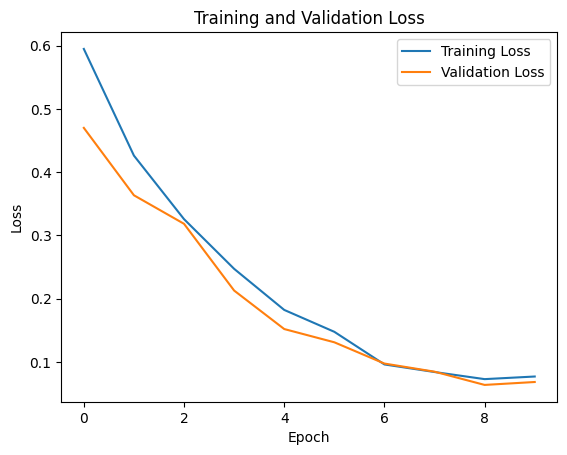

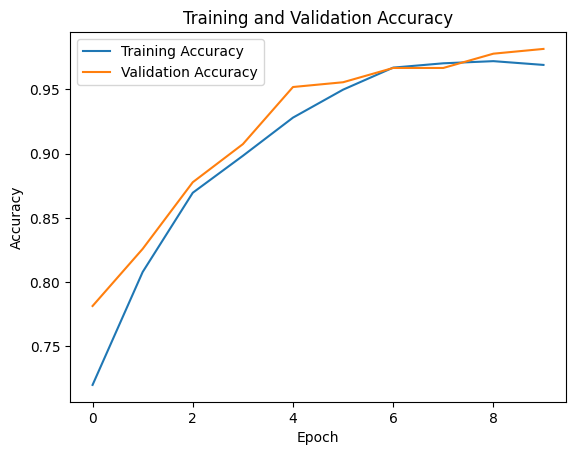

In [80]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(ANN_Model.history['loss'], label='Training Loss')
plt.plot(ANN_Model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(ANN_Model.history['accuracy'], label='Training Accuracy')
plt.plot(ANN_Model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
